# Analysis notebook: `dev_CRY_mix2BB_onspill-LH_aw`  

## Define analysis name

In [1]:
ana_label = "dev_CRY_mix2BB_onspill-LH_aw"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/dev_CRY_mix2BB_onspill-LH_aw

analysis.csv  dev_CRY_mix2BB_onspill-LH_aw.log	 events.parquet  info.txt
cut_flow.csv  dev_CRY_mix2BB_onspill-LH_aw.yaml  hists.h5	 results.pkl


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/dev_CRY_mix2BB_onspill-LH_aw


In [5]:
results = loader.load_pkl() 
# results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/dev_CRY_mix2BB_onspill-LH_aw/results.pkl


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"])

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2160537,100,100,No selection applied
1,has_trk_front,Preselect,2126506,98.425,98.425,Tracks intersect tracker entrance
2,has_trk_mid,Preselect,2126502,98.425,100,Tracks intersect tracker middle
3,is_reco_electron,Preselect,2054714,95.102,96.624,Electron track fits
4,one_reco_electron,Preselect,1479491,68.478,72.005,One reco electron / event
5,is_downstream,Preselect,825750,38.220,55.813,Has downstream track (p_z > 0 in tracker)
6,is_truth_electron,Preselect,258259,11.953,31.276,Track parents are electrons (truth PID)
7,good_trkqual,Tracker,182914,8.466,70.826,Track fit quality > 0.2
8,within_t0,Tracker,149420,6.916,81.689,t0 at tracker mid (640 < t_0 < 1650 ns)
9,within_t0err,Tracker,140902,6.522,94.299,Track fit t0 uncertainty (t0err < 0.9 ns)


### Efficiency & rates

In [7]:
display(results["analysis"])

None

### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Load] ✅ Initialised with out_path=test_out
[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/dev_CRY_mix2BB_onspill-LH_aw/h1o_1x3_mom_windows.png


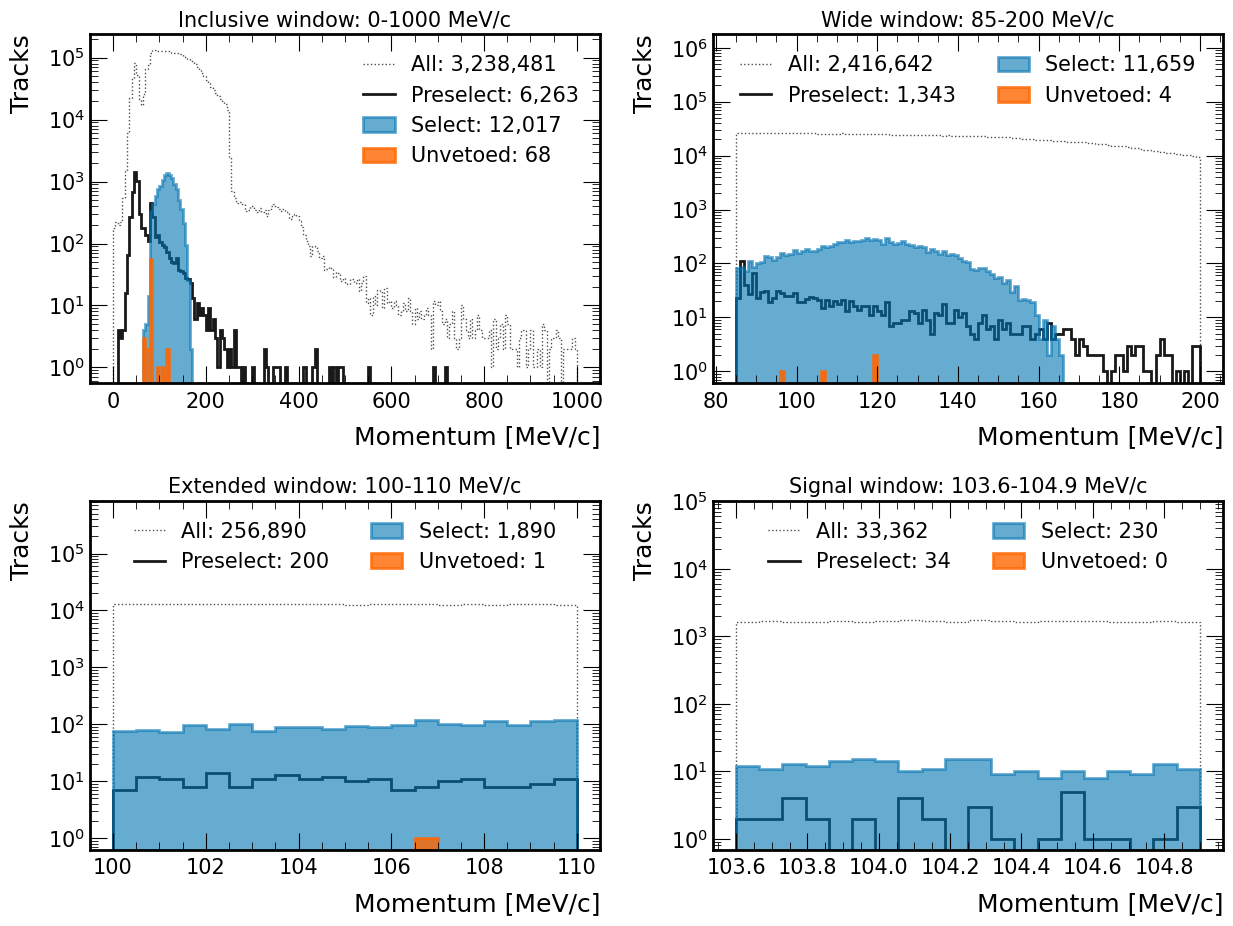

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/dev_CRY_mix2BB_onspill-LH_aw/h1o_3x3_summary.png


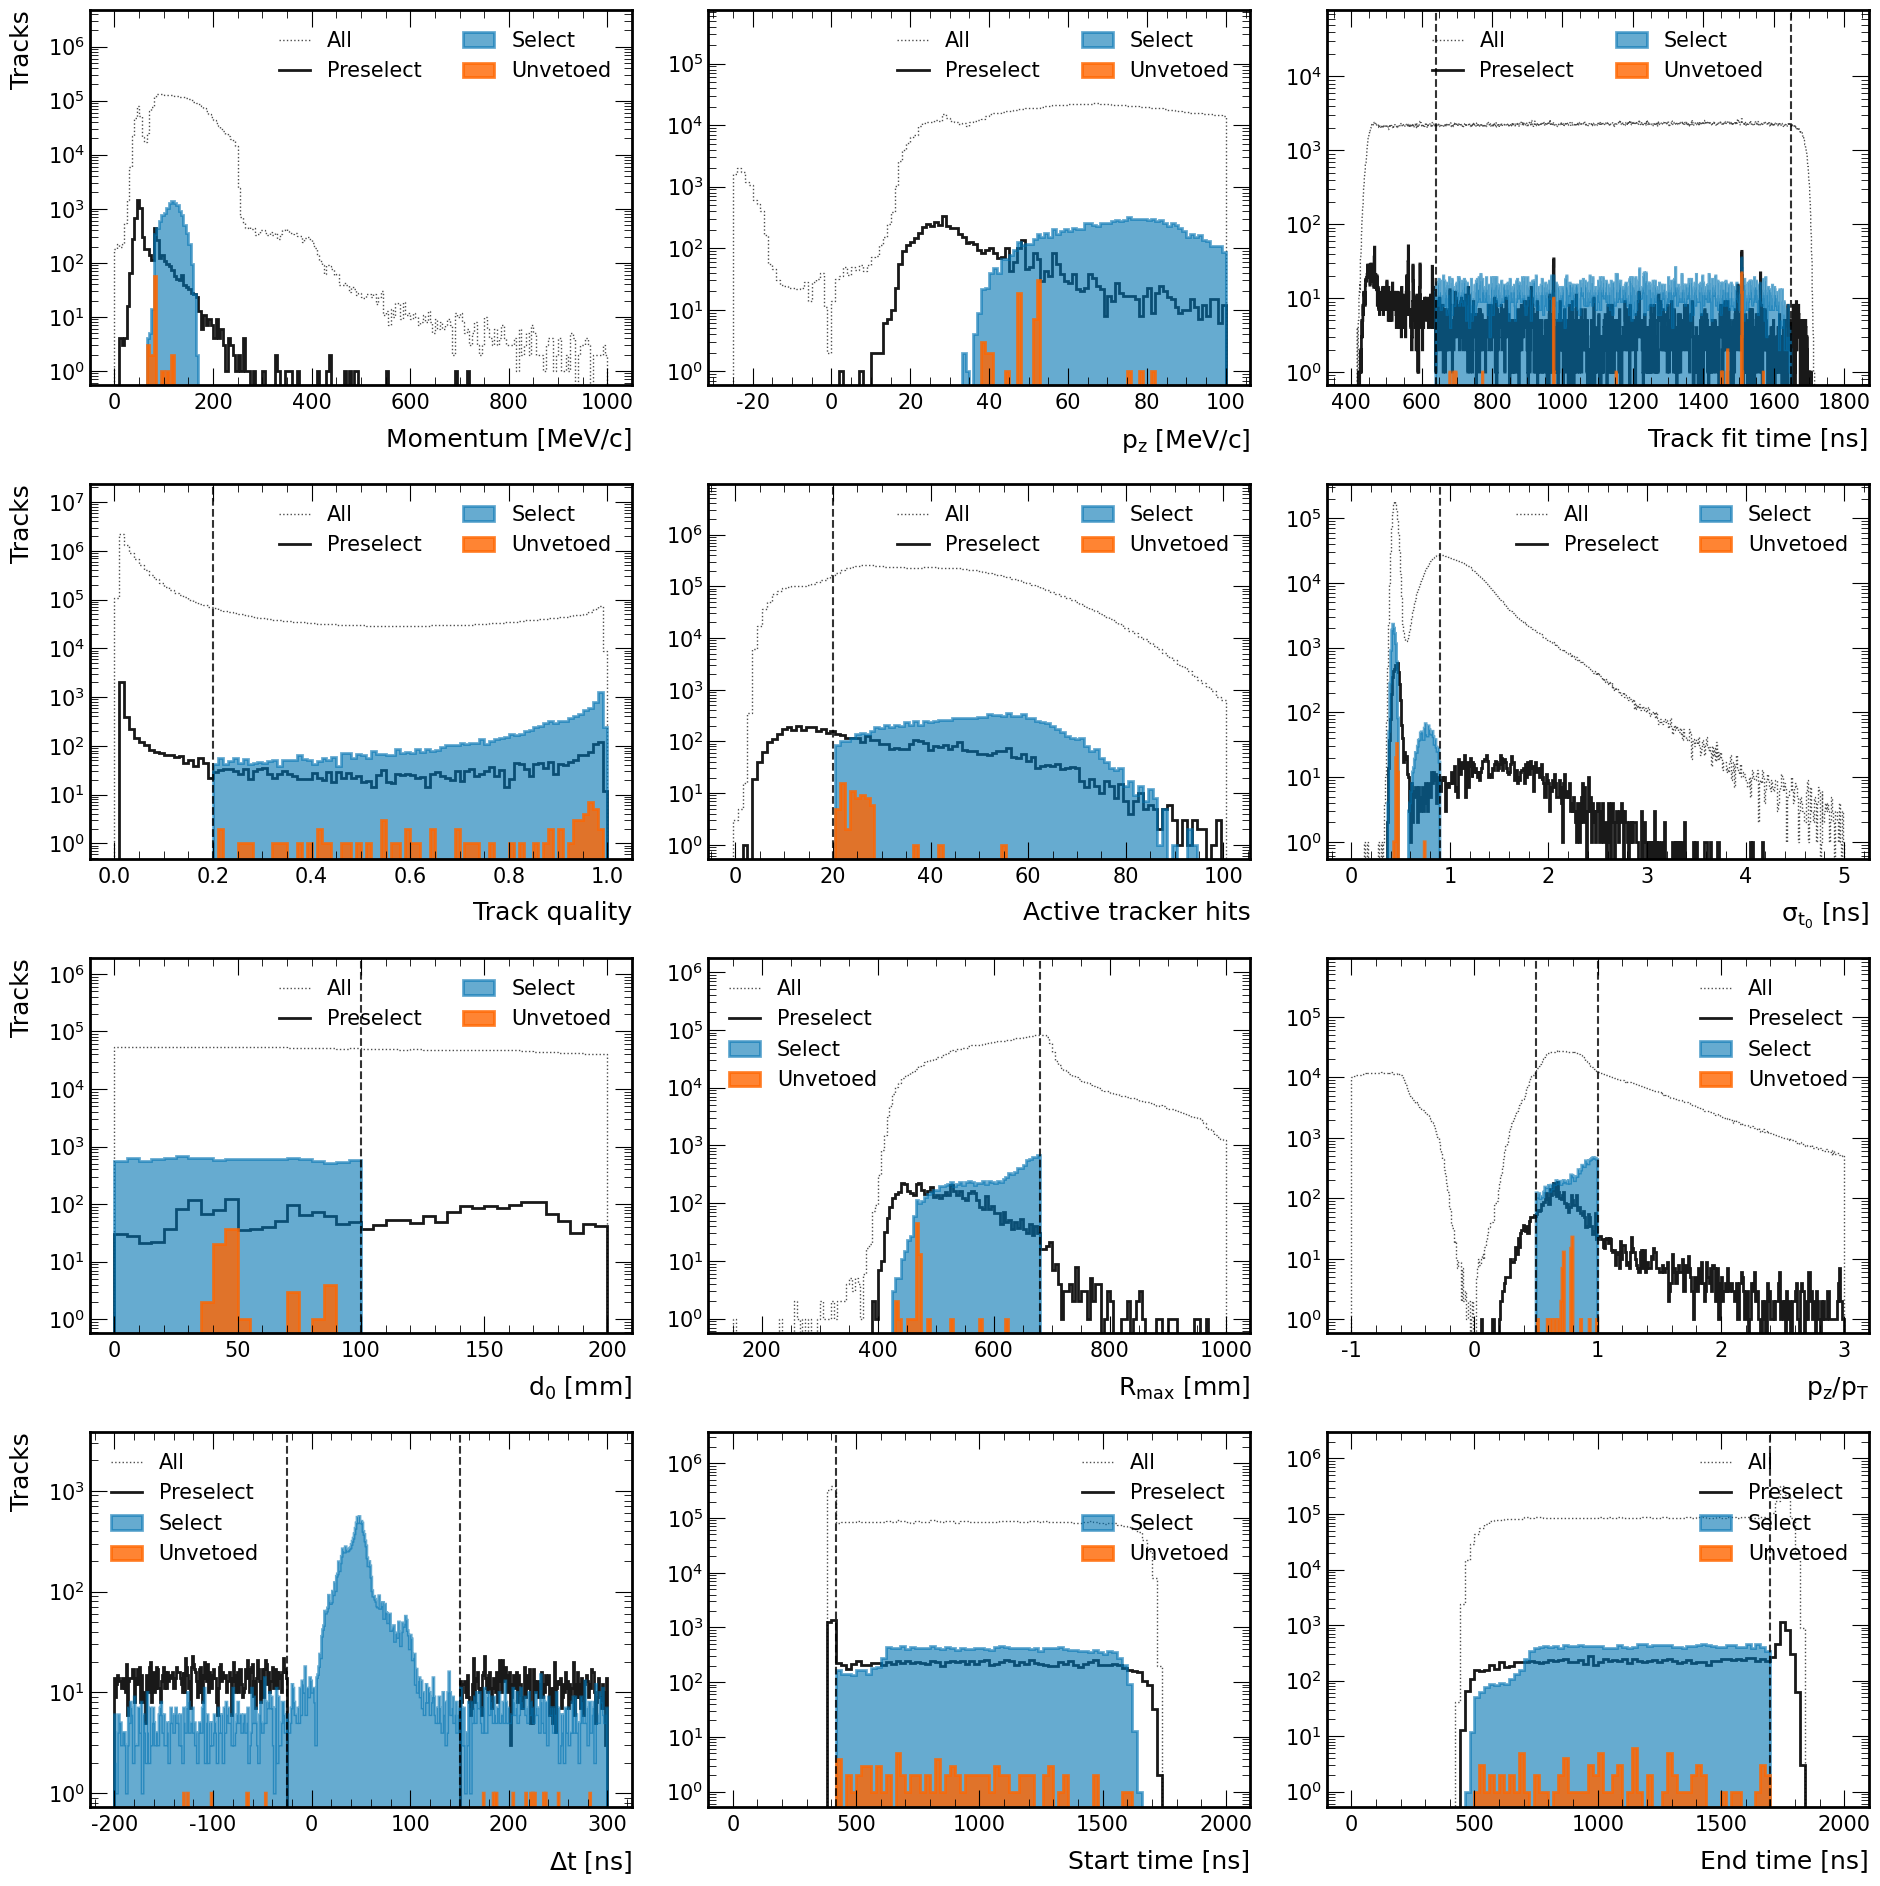

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/dev_CRY_mix2BB_onspill-LH_aw/h1o_2x2_mom_summary.png


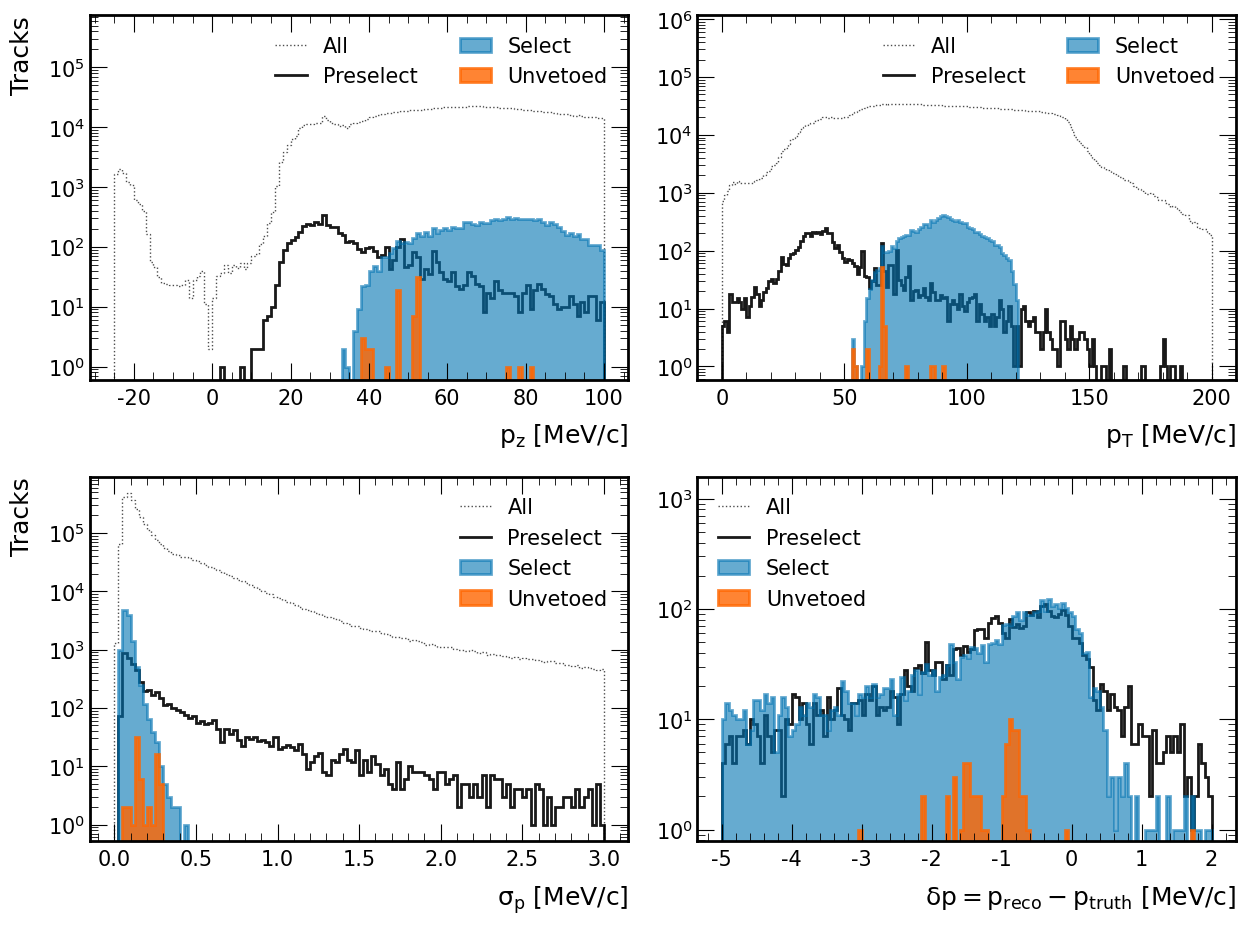

In [11]:
draw.plot_mom_summary(results["hists"], out_path=f"{img_dir}/h1o_2x2_mom_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/dev_CRY_mix2BB_onspill-LH_aw/h1o_crv_z.png


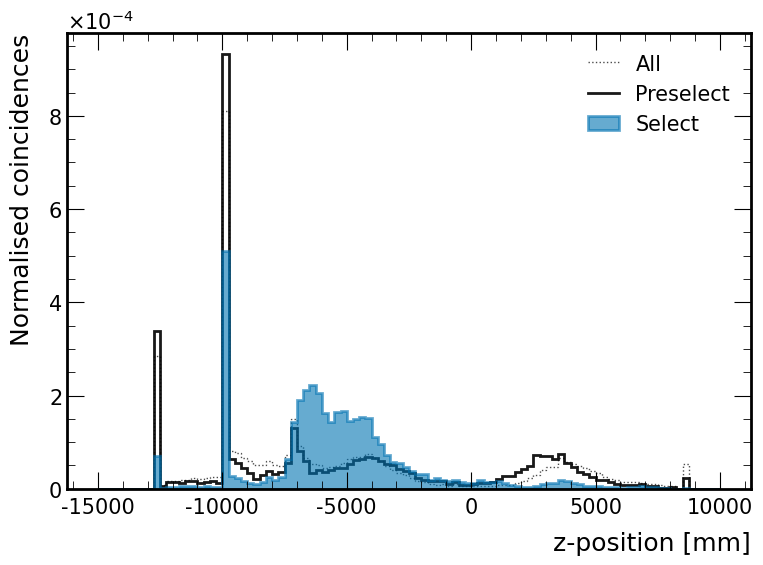

In [12]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

[Plot] ✅ 	Wrote ../../../output/images/dev_CRY_mix2BB_onspill-LH_aw/h1_cosmic_parents.png


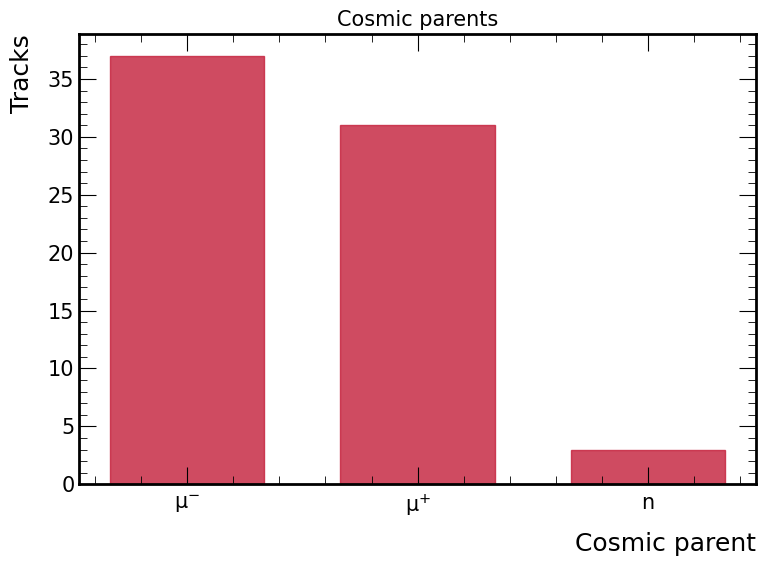

In [13]:
# draw.plot_cosmic_parents(results["hists"], out_path=f"{img_dir}/h1_cosmic_parents.png") 
draw.draw_cosmic_parents_from_array(results["events"], out_path=f"{img_dir}/h1_cosmic_parents.png") 

### Background event info

In [14]:
print(results["event_info"])

  Index:            19
  Subrun:           [3898]
  Event:            [82617]
  File:             nts.mu2e.CosmicCRYSignalAllMix2BBTriggered.MDC2020aw_best_v1_3_v06_06_00.001202_00000019.root
  Track time [ns]:  1469.809378
  Coinc time [ns]:  982.198669
  dt [ns]:          487.610709
----------------------------------------
  Index:            24
  Subrun:           [5610, 7323, 8198]
  Event:            [5316, 231281, 495784]
  File:             nts.mu2e.CosmicCRYSignalAllMix2BBTriggered.MDC2020aw_best_v1_3_v06_06_00.001202_00000047.root
  Track time [ns]:  974.804792, 975.153737, 975.657156
  Coinc time [ns]:  1104.595459, 634.782104, 1451.069580, 640.244263, 1197.272583, 522.824768, 555.011719
  dt [ns]:          129.790667
----------------------------------------
  Index:            50
  Subrun:           [2950, 3522, 3710]
  Event:            [470264, 19933, 247781]
  File:             nts.mu2e.CosmicCRYSignalAllMix2BBTriggered.MDC2020aw_best_v1_3_v06_06_00.001202_00000102.root
 

In [15]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 68 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 3898
evt.event: 82617
crv.crvcoincs.time: [982]
crv.crvcoincs.timeStart: [964]
crv.crvcoincs.timeEnd: [1.09e+03]
crv.crvcoincs.nHits: [20]
crv.crvcoincs.pos.fCoordinates.fZ: [-3.46e+03]
dev.at_trk_front: [[False, False, False, False, False, True, False], ..., [False, ..., True]]
dev.has_trk_front: [True, True, True, True, True, True]
dev.at_trk_mid: [[False, False, False, False, True, False, False], ..., [False, ..., False]]
dev.has_trk_mid: [True, True, True, True, True, True]
dev.is_reco_electron: [False, True, False, False, False, False]
dev.one_reco_electron: [True, True, True, True, True, True]
dev.one_reco_electron_per_event: True
dev.is_downstream: [True, True, False, True, True, False]
dev.all_downstream: [False, False, False, False, False, False]
dev.all_downst